<a href="https://colab.research.google.com/github/DevVarma19/Breast_cancer_detection_using_CNN/blob/main/BREAST_CANCER_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importing all the required libraries

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D

from keras.optimizers import Adam

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
 # Importing the dataset
 # URL : https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
 
 cancer = datasets.load_breast_cancer()

In [5]:
# Display the description

print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [6]:
# Creating a dataframe
# Store the parameters in X

X = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# Storing the target
y = cancer.target
print(cancer.target_names)

['malignant' 'benign']


In [12]:
X.shape, y.shape

((569, 30), (569,))

In [13]:
# Split the data into train and test dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [14]:
X_train.shape , X_test.shape

((455, 30), (114, 30))

In [16]:
# Scaling the data as the current data's features are not on the same scale

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.fit_transform(X_test)

In [18]:
 # CNN accepts a 3D data so reshape the 2D -> 3D

 X_train = X_train.reshape(455, 30, 1)
 X_test  = X_test.reshape(114, 30, 1)

In [31]:
# Building model
epochs = 100
model = Sequential()
model.add(Conv1D(filters = 32, kernel_size = 2, activation='relu', input_shape = (30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters = 64, kernel_size = 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)             

In [32]:
# Compiling model

model.compile(optimizer=Adam(lr=0.00005), loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
15/15 [==============================] - 0s 17ms/step - loss: 1.2214 - accuracy: 0.5538 - val_loss: 0.6572 - val_accuracy: 0.7368
Epoch 2/100
15/15 [==============================] - 0s 7ms/step - loss: 0.9080 - accuracy: 0.6484 - val_loss: 0.6006 - val_accuracy: 0.9211
Epoch 3/100
15/15 [==============================] - 0s 7ms/step - loss: 0.6140 - accuracy: 0.7187 - val_loss: 0.5512 - val_accuracy: 0.9298
Epoch 4/100
15/15 [==============================] - 0s 7ms/step - loss: 0.5111 - accuracy: 0.7956 - val_loss: 0.5106 - val_accuracy: 0.9211
Epoch 5/100
15/15 [==============================] - 0s 7ms/step - loss: 0.4295 - accuracy: 0.8066 - val_loss: 0.4720 - val_accuracy: 0.9123
Epoch 6/100
15/15 [==============================] - 0s 8ms/step - loss: 0.3484 - accuracy: 0.8352 - val_loss: 0.4397 - val_accuracy: 0.9123
Epoch 7/100
15/15 [==============================] - 0s 8ms/step - loss: 0.3176 - accuracy: 0.8659 - val_loss: 0.4095 - val_accuracy: 0.9035
Epoch 8/100


In [34]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

In [28]:
history.history

{'accuracy': [0.5582417845726013,
  0.6571428775787354,
  0.7252747416496277,
  0.7780219912528992,
  0.8505494594573975,
  0.8439560532569885,
  0.8681318759918213,
  0.8725274801254272,
  0.8879120945930481,
  0.8813186883926392,
  0.9054945111274719,
  0.8703296780586243,
  0.9142857193946838,
  0.89670330286026,
  0.9142857193946838,
  0.9362637400627136,
  0.9120879173278809,
  0.9296703338623047,
  0.9142857193946838,
  0.9164835214614868,
  0.9340659379959106,
  0.9362637400627136,
  0.9428571462631226,
  0.9472527503967285,
  0.9362637400627136,
  0.9230769276618958,
  0.9560439586639404,
  0.9384615421295166,
  0.9362637400627136,
  0.9340659379959106,
  0.9406593441963196,
  0.9582417607307434,
  0.9494505524635315,
  0.9450549483299255,
  0.9516483545303345,
  0.9472527503967285,
  0.9494505524635315,
  0.9516483545303345,
  0.9516483545303345,
  0.9472527503967285,
  0.9560439586639404,
  0.9582417607307434,
  0.9626373648643494,
  0.9494505524635315,
  0.9670329689979553,


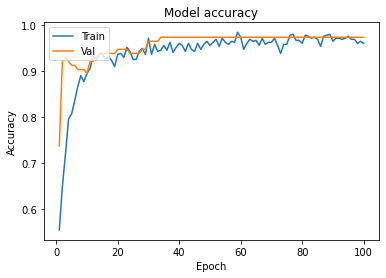

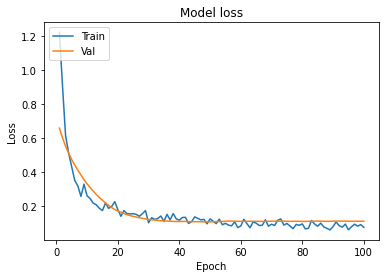

In [35]:
plot_learningCurve(history, epochs)